<a href="https://colab.research.google.com/github/durvangparab967/C-Programs/blob/main/trade_collateral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(100)

# Generate synthetic trading data
num_samples = 100000
accounts = ['Account1', 'Account2', 'Account3']
regions = ['APAC', 'EMEA', 'NA']
trade_types = ['Manual', 'STP']

data = {
    'Account': np.random.choice(accounts, num_samples),
    'Region': np.random.choice(regions, num_samples),
    'Trade_Type': np.random.choice(trade_types, num_samples),
    'Collateral_Amount': np.random.normal(1000000, 500000, num_samples),  # Mean = 1,000,000, Std. Dev. = 500,000
}

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Save the synthetic dataset to a CSV file
df.to_csv('trading_data.csv', index=False)


In [ ]:
data = pd.read_csv('trading_data.csv')

In [ ]:
data.head(10)

,Account,Region,Trade_Type,Collateral_Amount,z_score
0,Account1,APAC,STP,1.102653e+06,0.204114
1,Account1,NaN,STP,9.886796e+05,-0.024316
2,Account1,APAC,Manual,1.145529e+06,0.290047
3,Account3,APAC,Manual,3.067410e+05,-1.391082
4,Account3,EMEA,STP,3.363087e+05,-1.331821
5,Account1,EMEA,STP,1.041571e+06,0.081691
6,Account3,EMEA,Manual,1.175578e+06,0.350272
7,Account2,APAC,Manual,5.497157e+05,-0.904103
8,Account3,APAC,STP,7.457898e+05,-0.511124
9,Account3,NaN,STP,4.853294e+04,-1.908592


In [ ]:
# Define the feature containing collateral data
#collateral_feature = 'collateral_amount'

# Calculate the mean and standard deviation of the collateral feature
mean_collateral = data['Collateral_Amount'].mean()
std_collateral = data['Collateral_Amount'].std()

# Define a Z-score threshold for anomaly detection (e.g., 3)
z_score_threshold = 2

# Calculate the Z-scores for each data point
data['z_score'] = (data['Collateral_Amount'] - mean_collateral) / std_collateral

# Detect anomalies based on the Z-score threshold
anomalies = data[data['z_score'] > z_score_threshold]

# Print or log the detected anomalies
print("Detected Anomalies (Abnormally High Collateral):")
print(anomalies)


Detected Anomalies (Abnormally High Collateral):
        Account Region Trade_Type  Collateral_Amount   z_score
115    Account1   EMEA     Manual       2.059697e+06  2.122257
140    Account1   APAC     Manual       2.291514e+06  2.586871
176    Account2    NaN        STP       2.163182e+06  2.329664
184    Account3    NaN        STP       2.161848e+06  2.326991
240    Account2   APAC        STP       2.221444e+06  2.446434
...         ...    ...        ...                ...       ...
99778  Account3   EMEA        STP       2.010252e+06  2.023156
99792  Account3   APAC        STP       2.300152e+06  2.604185
99873  Account3   APAC     Manual       2.265109e+06  2.533949
99937  Account2   EMEA     Manual       2.043667e+06  2.090127
99961  Account3   APAC        STP       2.028429e+06  2.059588

[2299 rows x 5 columns]


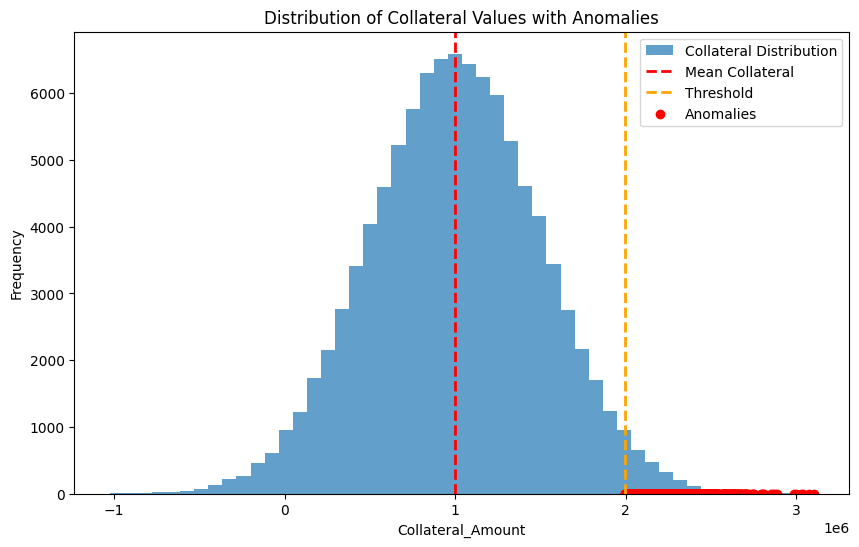

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['Collateral_Amount'], bins=50, alpha=0.7, label='Collateral Distribution')
plt.axvline(x=mean_collateral, color='red', linestyle='dashed', linewidth=2, label='Mean Collateral')
plt.axvline(x=mean_collateral + z_score_threshold * std_collateral, color='orange', linestyle='dashed', linewidth=2, label='Threshold')
plt.scatter(anomalies['Collateral_Amount'], [0] * len(anomalies), color='red', label='Anomalies', marker='o')
plt.xlabel('Collateral_Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Collateral Values with Anomalies')
plt.show()

Part-2

In [ ]:
import pandas as pd
import numpy as np

# Define the number of samples
num_samples = 1000

# Define the number of collateral features
num_collateral_features = 5

# Generate random data for collateral features
np.random.seed(42)  # For reproducibility

data = {
    f'collateral_feature_{i+1}': np.random.normal(loc=0, scale=1, size=num_samples)
    for i in range(num_collateral_features)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Introduce anomalies (fraudulently high collateral) in a subset of samples
num_anomalies = int(0.05 * num_samples)  # 5% of samples are anomalies
anomaly_indices = np.random.choice(num_samples, num_anomalies, replace=False)

for i in anomaly_indices:
    for j in range(num_collateral_features):
        df.at[i, f'collateral_feature_{j+1}'] = np.random.normal(loc=5, scale=1, size=1)  # Introduce anomalies

# Save the synthetic dataset to a CSV file
df.to_csv('synthetic_collateral_dataset.csv', index=False)


In [ ]:
df.head(5)

,collateral_feature_1,collateral_feature_2,collateral_feature_3,collateral_feature_4,collateral_feature_5
0,0.496714,1.399355,-0.675178,-1.907808,-0.863494
1,5.785741,6.354330,4.755220,5.491669,2.144011
2,0.647689,0.059630,-0.792420,-0.413606,0.018017
3,1.523030,-0.646937,-0.307962,1.887688,0.472630
4,-0.234153,0.698223,-1.893615,0.556553,-1.366858


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('synthetic_collateral_dataset.csv')

# Define the features (collateral-related features) you want to use for detection
features = ['collateral_feature_1','collateral_feature_2','collateral_feature_3','collateral_feature_4','collateral_feature_5'];

# Split the data into training and testing sets
X_train, X_test = train_test_split(data[features], test_size=0.2, random_state=42)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # You may need to adjust the contamination hyperparameter
model.fit(X_train)

# Predict anomalies on the test data
test_predictions = model.predict(X_test)

# Convert predictions (-1 for anomalies, 1 for normal) to binary labels (0 for anomalies, 1 for normal)
binary_predictions = [1 if p == 1 else 0 for p in test_predictions]

# Calculate accuracy and recall
accuracy = accuracy_score(binary_predictions,test_predictions)



print(f"Accuracy: {accuracy * 100:.2f}%")
print("Recall Score :",recall_score(binary_predictions, test_predictions,pos_label='positive',average='micro'))


Accuracy: 95.00%
Recall Score : 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
